<a href="https://colab.research.google.com/github/Debanjana-github/SampleSuperstore_EDA/blob/main/US__SampleSupertore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: DEBNJANA KUNDU   
CHRIST UNIVERSITY, Bangalore    
M.Sc in DATA SCIENCE

Dataset link: "https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset"

PROBLEM STATEMENT:     
Perform EDA on data sampleSuperstore. as a business manager, try to find out the weak areas where you can work to make more profit. what all business problems you can derive by emploring the data.


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
df=pd.read_csv("/content/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


DATASET DESCRIPTION:  
These is a US sample superstore dataset consists of various fields related to sales and profitability in a retail or superstore setting. Here is a description of each field:

1. Ship Mode: This field indicates the mode of shipment or delivery for the products, which could include options like standard shipping, express shipping, etc.

2. Segment: Segment categorizes customers into different groups based on certain criteria, such as consumer, corporate, or home office.

3. Country: This field represents the country where the retail or superstore operates. In this case, it appears to be limited to a single country, the United States.

4. City: City refers to the specific city where the retail store is located or where the sale was made.

5. State: State represents the state within the United States where the retail store is situated or where the transaction occurred.

6. Postal Code: Postal code is the numerical code used for postal or ZIP code identification in the United States.

7. Region: Region typically denotes a geographical area within the United States, such as East, West, North, or South.

8. Category: Category classifies products into broader categories, such as office supplies, furniture, or technology.

9. Sub-Category: Sub-category provides further granularity by specifying the type or subtype of a product within its category. For example, within the "Office Supplies" category, sub-categories could include pens, paper, or envelopes.

10. Sales: Sales represent the monetary value of the products sold in each transaction or sale.

11. Quantity: Quantity denotes the number of units of a product sold in each transaction.

12. Discount: Discount reflects the amount of price reduction or discount applied to the products in each transaction.

13. Profit: Profit indicates the monetary gain or loss resulting from each transaction, calculated as the difference between the sales revenue and the cost.

In [ ]:
df.shape

(9994, 13)

In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
df=df.drop(['Postal Code'],axis=1)
df=df.drop(['Country'],axis=1)

In [ ]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


EXPLORATORY DATA ANALYSIS IN VARIOUS ASPECT

Profit by Region and State:    
Examine profitability variations across regions and states. Identify regions or states with consistently low profits

In [ ]:
profit_by_region_states=df.groupby(['Region','State'])['Profit'].sum().reset_index()
profit_by_region_states

,Region,State,Profit
0,Central,Illinois,-12607.8870
1,Central,Indiana,18382.9363
2,Central,Iowa,1183.8119
3,Central,Kansas,836.4435
4,Central,Michigan,24463.1876
5,Central,Minnesota,10823.1874
6,Central,Missouri,6436.2105
7,Central,Nebraska,2037.0942
8,Central,North Dakota,230.1497
9,Central,Oklahoma,4853.9560


In [ ]:
low_profit_region_states=profit_by_region_states.sort_values(by=['Profit'],ascending=True)

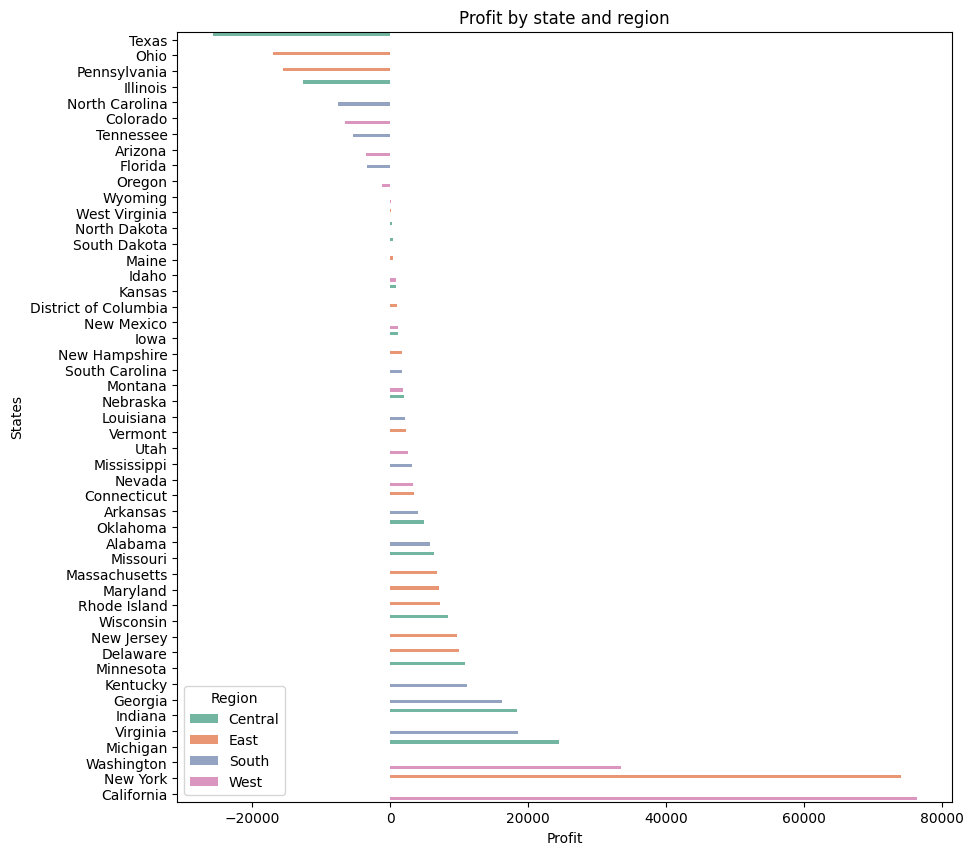

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Profit',y='State',data=low_profit_region_states,hue='Region',palette='Set2')
plt.title("Profit by state and region")
plt.xlabel("Profit")
plt.ylabel("States")
plt.show()

Observations:   
Texas State has gain more loss near 20k which is in Central region of United State country. And then Ohio, Pennsylvania near 15k losses from these states which belong to East region.

Category and Sub-Category Analysis:     
Analyze profit margins for different product categories and sub-categories. Identify high-profit and low-profit categories, and consider reallocating resources to emphasize the sale of products with better margins.

In [ ]:
category_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].mean().reset_index()
category_profit

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-15.230509
1,Furniture,Chairs,43.095894
2,Furniture,Furnishings,13.645918
3,Furniture,Tables,-55.565771
4,Office Supplies,Appliances,38.922758
5,Office Supplies,Art,8.200737
6,Office Supplies,Binders,19.843574
7,Office Supplies,Envelopes,27.418019
8,Office Supplies,Fasteners,4.375660
9,Office Supplies,Labels,15.236962


Observations:    
from Technology category did not make any loss. and Furniture category make loss than otherr teo category.

In [ ]:
sorted_category_profit = category_profit.sort_values(by='Profit', ascending=False)
high_profit_categories = sorted_category_profit.head(10)
low_profit_categories = sorted_category_profit.tail(10)


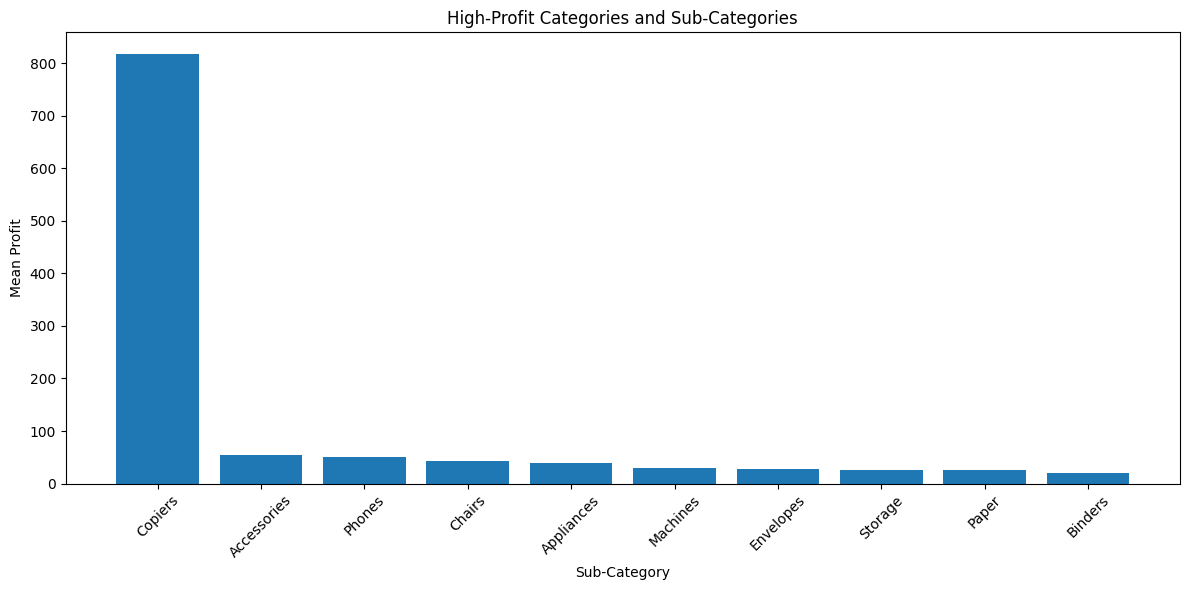

In [ ]:
# High-Profit Categories and Sub-Categories
plt.figure(figsize=(12, 6))
plt.bar(high_profit_categories['Sub-Category'], high_profit_categories['Profit'])
plt.title('High-Profit Categories and Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Mean Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

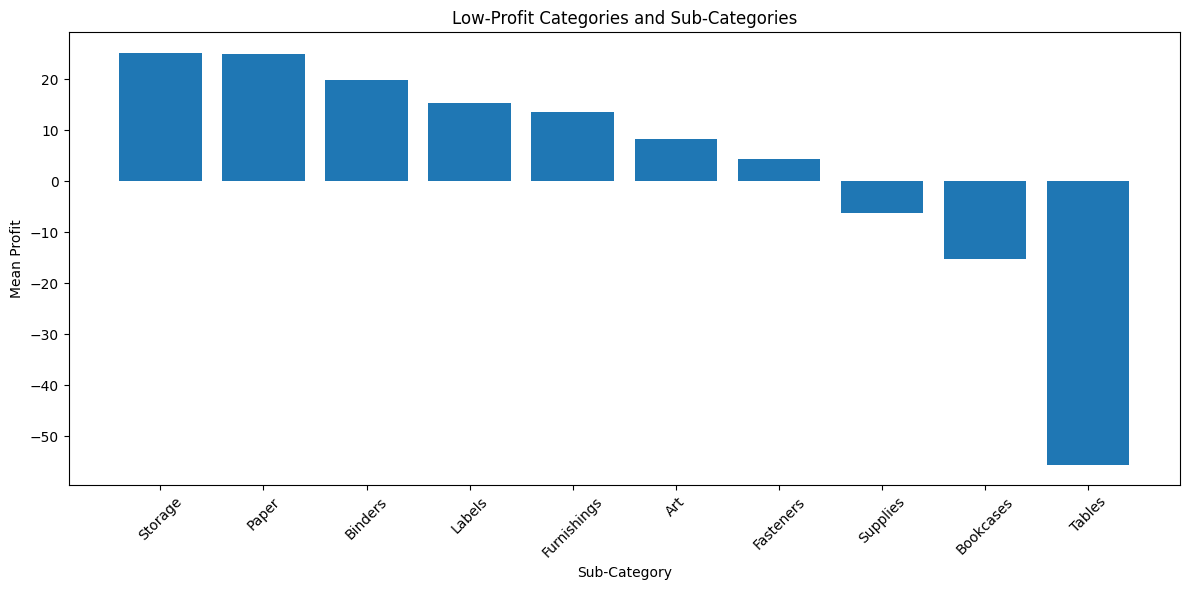

In [ ]:
# Low-Profit Categories and Sub-Categories
plt.figure(figsize=(12, 6))
plt.bar(low_profit_categories['Sub-Category'], low_profit_categories['Profit'])
plt.title('Low-Profit Categories and Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Mean Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations:  
Tables, bookcases all are from Furniture category which make more loss but Supplies from Office supliese category.

Sales and Quantity Relationship:      
Investigate the relationship between sales and quantity sold. Determine if offering discounts for bulk purchases increases profitability or if it's more effective to optimize sales prices to increase overall profit.

In [ ]:
import statsmodels.api as sm

In [ ]:
# Select relevant columns
df1 = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Create a new column for discounted sales
df1['Discounted_Sales'] = df1['Sales'] * (1 - df1['Discount'])

# Split the data into independent (X) and dependent (Y) variables
X = df1[['Quantity', 'Discounted_Sales']]
Y = df1['Profit']

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)


<ipython-input-71-9a1cdc8f1caf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Discounted_Sales'] = df1['Sales'] * (1 - df1['Discount'])


In [ ]:
df1.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Discounted_Sales'], dtype='object')

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Fit a multiple linear regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     3389.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:07:09   Log-Likelihood:                -66124.
No. Observations:                9994   AIC:                         1.323e+05
Df Residuals:                    9991   BIC:                         1.323e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3940      3.573  

Observations:   
1. R-squared and Adjusted R-squared:    
This value indicates the goodness of fit of the model. In this case, R-squared is 0.404, which means that the model explains approximately 40.4% of the variability in Profit. A higher R-squared suggests a better fit, but here other factors not included in the model may also affect Profit.
2. Coefficients:   
Quantity: The coefficient for Quantity is -6.6967. It indicates that, holding all other variables constant, for each additional unit sold, Profit decreases by approximately 6.70 dolar.   
 Discounted_sales: The coefficent for these is 0.28. It indicates that, holding all other variables constant, a one-unit increase in Discounted_Sales leads to an increase in Profit by approximately $0.28.  

3. P-values and F-statistics:     
The p-values associated with each coefficient tell you if that coefficient is statistically significant. In this case, both Quantity and Discounted_Sales have p-values close to zero (p < 0.05) and F-statistics 3389, indicating that they are statistically significant in explaining Profit.
4. Omnibus, Jarque-Bera, and Kurtosis:    
These statistics are related to the normality of the residuals (errors). In this case, the model's residuals do not follow a normal distribution, as indicated by a very low p-value (Prob(Omnibus)) and a high Kurtosis value.
5. Durbin-Watson:   
The Durbin-Watson statistic checks for autocorrelation in the residuals. A value close to 2 suggests no significant autocorrelation. In this case, the value is approximately 1.974, indicating little autocorrelation.


Interpretation:   
1. The negative coefficient for Quantity suggests that an increase in the number of units sold leads to a decrease in Profit. This could be due to factors like higher costs associated with producing or sourcing more units.   
2. The positive coefficient for Discounted_Sales indicates that offering discounts on sales contributes positively to Profit. It suggests that discounts, on average, lead to increased profitability.    
However, it's crucial to consider the context and other relevant factors that might influence Profit, as the model explains only a portion of the variability.
The model appears to be statistically significant, but it's important to address potential issues like multicollinearity and non-normality of residuals.

Discount Impact:   
Assess the impact of discounts on profit. Determine if offering excessive discounts negatively affects profit margins. Optimize discount strategies to maximize profit while maintaining competitiveness.

In [ ]:
min_discount = df['Discount'].min()
min_discount

0.0

In [ ]:
min_discount = df['Discount'].max()
min_discount

0.8

In [ ]:
# Select relevant columns
data = df[['Discount', 'Profit', 'Sales']]

# Calculate profit margin (profit as a percentage of sales)
data['Profit_Margin'] = (data['Profit'] / data['Sales']) * 100


<ipython-input-124-7fbd4522fbcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profit_Margin'] = (data['Profit'] / data['Sales']) * 100


In [ ]:
# Group the data by discount levels and calculate average profit margin for each
discount_analysis = data.groupby('Discount')['Profit_Margin'].mean().reset_index()
discount_analysis

,Discount,Profit_Margin
0,0.00,34.016048
1,0.10,15.579196
2,0.15,3.416290
3,0.20,17.683894
4,0.30,-11.548143
5,0.32,-17.429194
6,0.40,-22.249191
7,0.45,-45.454545
8,0.50,-54.909091
9,0.60,-68.913043


Observations:    
Above table shows that in the whole dataset contains 11 types of discount category and then respectively count the Profit margin.

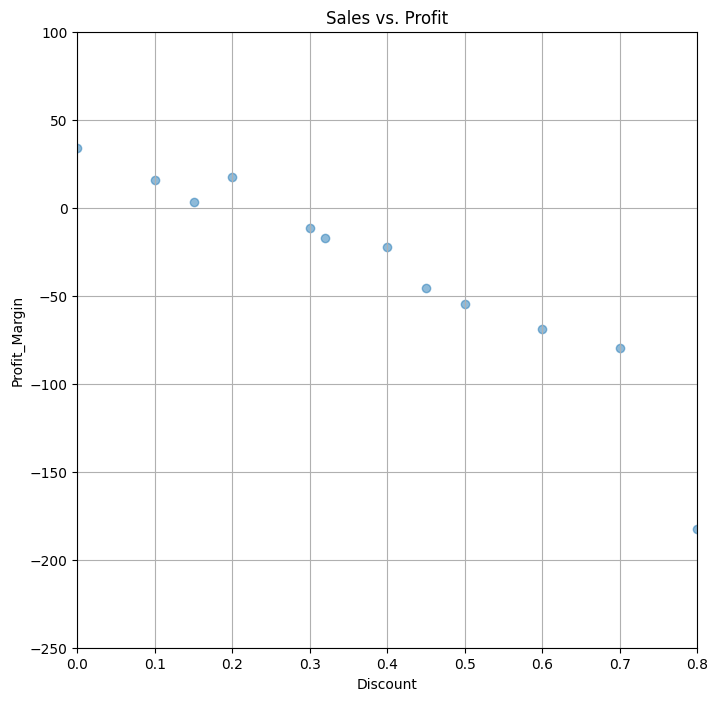

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(discount_analysis['Discount'], discount_analysis['Profit_Margin'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit_Margin')
plt.title('Sales vs. Profit')
plt.grid(True)
plt.xlim(0, 0.8)
plt.ylim(-250, 100)
plt.show()


Observations:    
From the above scatter plot we can say that when discount is high in that time profit margin is loss, which is quiet normal scenario.

Segment Profitability:   
Explore profit variations among different customer segments. Identify segments that generate the most profit and those that need improvement. Tailor marketing and sales approaches accordingly.

In [ ]:
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
segment_profit = segment_profit.sort_values(by='Profit', ascending=False)


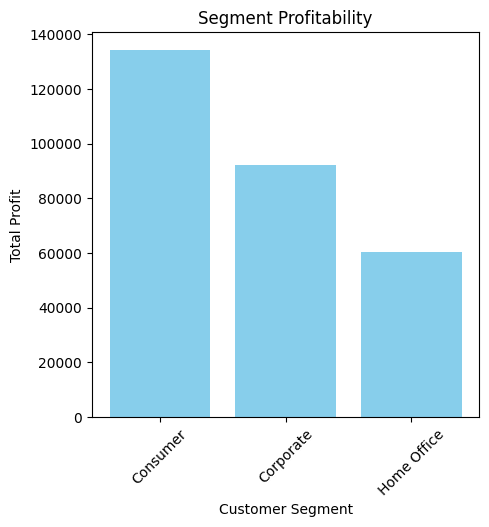

In [ ]:
# Create a bar chart to visualize segment profitability
plt.figure(figsize=(5,5))
plt.bar(segment_profit['Segment'], segment_profit['Profit'], color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.title('Segment Profitability')
plt.xticks(rotation=45)
plt.show()


Observations:      
From Consumer segment gain more profit, then corporate and then Home office.

City-Country Insights:   
Examine profit disparities among cities and countries. Identify lucrative and underperforming markets. Devote resources to expanding in profitable locations or addressing challenges in underperforming ones.

In [ ]:
city_profit = df.groupby(['Region','City'])['Profit'].mean().reset_index()

# Sort the countries by profit in descending order
city_profit_sorted = city_profit.sort_values(by='Profit', ascending=False)


In [ ]:
bottom_15_cities = city_profit_sorted.tail(15)

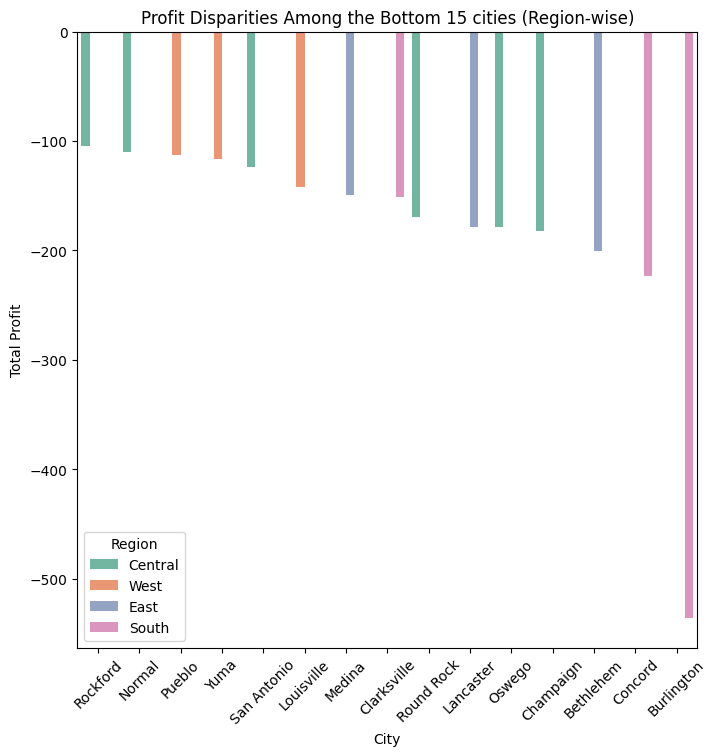

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='City', y='Profit', data=bottom_15_cities, hue='Region', palette='Set2')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.title('Profit Disparities Among the Bottom 15 cities (Region-wise)')
plt.xticks(rotation=45)
plt.show()


Market Expansion Opportunities:   
 Identify regions, states, or countries with untapped potential based on sales and profit data. Develop market expansion strategies for these areas.

In [ ]:
# Select relevant columns, including 'Region', 'State', 'Country', 'Sales', and 'Profit'
data = df[['Region', 'State', 'Sales', 'Profit']]


In [ ]:
# Group the data by the geographical level you want to analyze, such as 'Region', 'State', or 'Country'
# Calculate total sales and profit for each region/state/country
region_sales_profit = data.groupby(['Region', 'State'])[['Sales', 'Profit']].sum().reset_index()


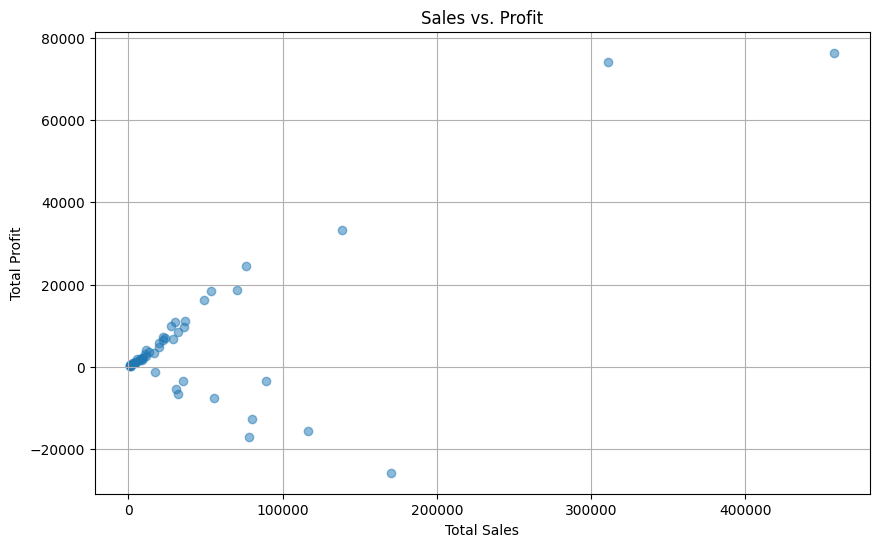

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(region_sales_profit['Sales'], region_sales_profit['Profit'], alpha=0.5)
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.title('Sales vs. Profit')
plt.grid(True)
plt.show()


Observations:   
From the above scatter plot we can see that there are minimum points where sales(300000-400000) and profit(60000-80000) are high which here makes outliers. Maximum sales between 0 to 100000 and profit 0-20000. ALso some cases where sales are between 0-100000 but make loss near 15000-20000.

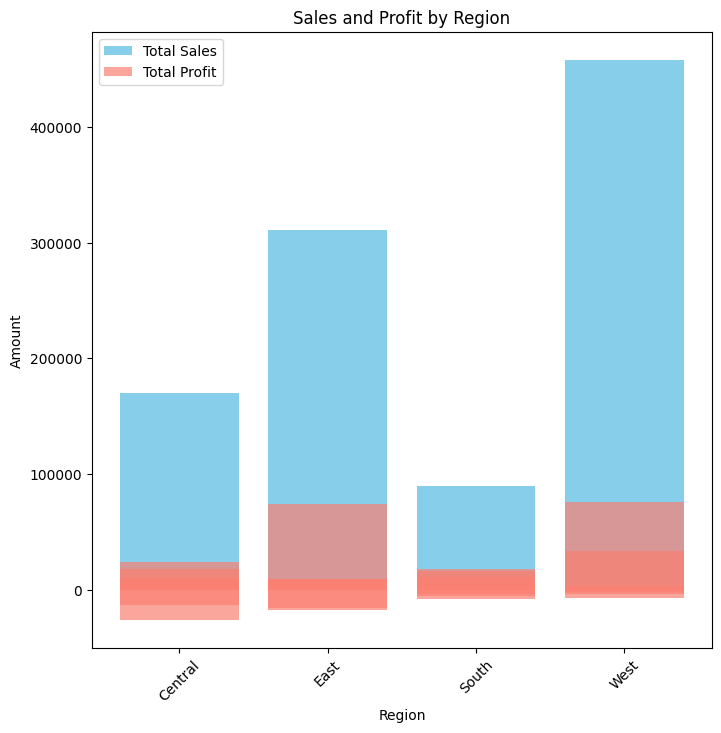

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(region_sales_profit['Region'], region_sales_profit['Sales'], label='Total Sales', color='skyblue')
plt.bar(region_sales_profit['Region'], region_sales_profit['Profit'], label='Total Profit', color='salmon', alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales and Profit by Region')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Observations:    
From the above stacked bar plot we can see that maximum sales in west region and south region sales low. Also East and West region sales difference 100000 but make similar type of profit near 50000 but also East region makes some losses. Central region sales and profit are not good not bad but that region make some losses from business. But south region need growth.   
so overall we can say that West region business strategy is good, central region moderately not good because there are huge amount of losses and south region also has not good business.

Total sales,profit and quatity calculation:

In [ ]:
category_analysis = pd.DataFrame(df.groupby(['Region'])[['Sales','Profit','Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Region,,,
Central,501239.8908,39706.3625,8780
East,678781.2400,91522.7800,10618
South,391721.9050,46749.4303,6209
West,725457.8245,108418.4489,12266


<Axes: xlabel='Region'>

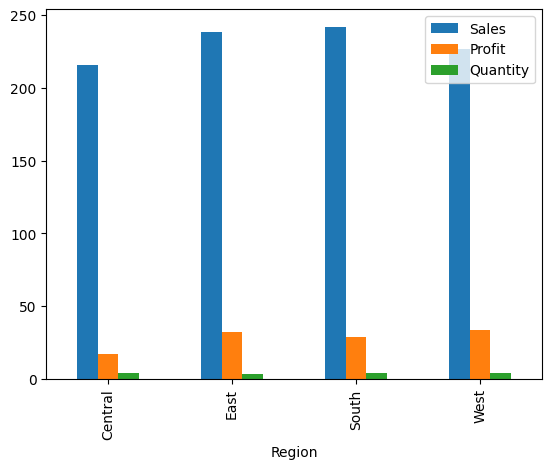

In [ ]:
#visualization of abouve table
category_analysis2 = pd.DataFrame(df.groupby(['Region'])[['Sales','Profit','Quantity']].mean())
category_analysis2.plot.bar()

State loss analysis:   
from the above situation we conclude that Central, South region makes maximum loss. so here we visualize the under these region which state makes losses more.

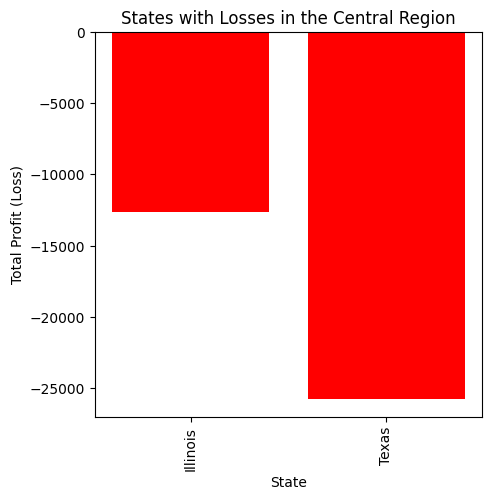

In [ ]:
target_region = 'Central'
filtered_data = df[df['Region'] == target_region]
city_profit_loss = filtered_data.groupby('State')['Profit'].sum().reset_index()

#Create a bar chart to visualize cities with losses
loss_cities = city_profit_loss[city_profit_loss['Profit'] < 0]

plt.figure(figsize=(5,5))
plt.bar(loss_cities['State'], loss_cities['Profit'], color='red')
plt.xlabel('State')
plt.ylabel('Total Profit (Loss)')
plt.title(f'States with Losses in the {target_region} Region')
plt.xticks(rotation=90)
plt.show()

Observations:   
From the above bar graph we can say more accurately under thr central region Texas has maximum losses near 25000 and then Illinois.

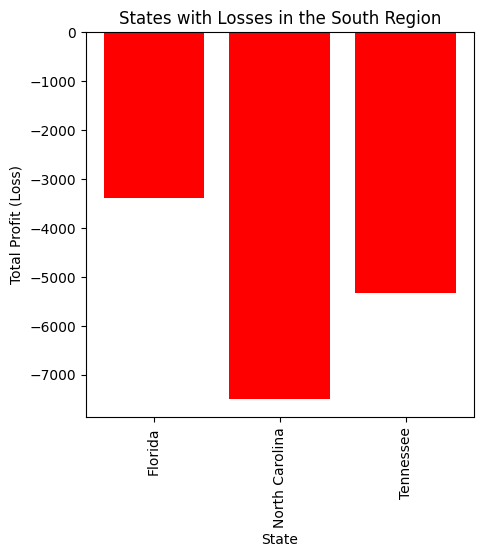

In [ ]:
target_region = 'South'
filtered_data = df[df['Region'] == target_region]
city_profit_loss = filtered_data.groupby('State')['Profit'].sum().reset_index()

#Create a bar chart to visualize cities with losses
loss_cities = city_profit_loss[city_profit_loss['Profit'] < 0]

plt.figure(figsize=(5,5))
plt.bar(loss_cities['State'], loss_cities['Profit'], color='red')
plt.xlabel('State')
plt.ylabel('Total Profit (Loss)')
plt.title(f'States with Losses in the {target_region} Region')
plt.xticks(rotation=90)
plt.show()

Observations:   
From the above bar graph we can say more accurately under thr South region North Carolina has maximum losses near 8000 and then Tennessee, Florida.

CONCLUSION:  
As a business manager, conducting an in-depth analysis of the data has revealed several key insights and areas of concern that can inform strategic decisions to enhance profitability and address business challenges:

1. Regional Profit Disparities:
   - Texas State, located in the Central region, has incurred significant losses, amounting to nearly 20,000.
   - States like Ohio and Pennsylvania in the East region have also experienced notable losses, each around 15,000.

2. Category Analysis:
   - The Technology category has performed well, with no recorded losses, indicating a strong product category.
   - In contrast, the Furniture category has faced losses, suggesting the need for optimization or reconsideration of product offerings.

3. Sub-Category Examination:
   - Within the Furniture category, products like Tables and Bookcases have contributed to higher losses, requiring a closer look at pricing or marketing strategies.
   - However, the Office Supplies category, particularly Supplies, has incurred losses, indicating the necessity to address underlying issues.

4. Regression Analysis:
   - The regression analysis model explains approximately 40.4% of the variability in Profit.
   - Quantity sold negatively impacts Profit, suggesting a need to manage costs associated with increased sales.
   - Discounts have a positive influence on Profit, indicating the effectiveness of discount strategies.

5. Discount Impact:
   - High discounts are associated with lower profit margins, indicating the importance of optimizing discount strategies to balance competitiveness and profitability.

6. Outliers and Sales Patterns:
   - Outliers in the dataset indicate instances of exceptionally high sales and profit, which can be further explored for potential strategies.
   - Most sales fall in the range of $0 to $100,000, with profit varying from losses to 20,000.

7. Regional Performance:
   - The West region demonstrates a successful business strategy, while the Central region faces significant losses.
   - The South region requires growth strategies to improve its overall performance.

8. Identified Weak Areas:
   - Central region, particularly in Texas, Illinois, North Carolina, Tennessee, and Florida, demands immediate attention to mitigate losses.
   - Strategies for optimizing discount policies, addressing product categories, and expanding in profitable regions should be considered.



FUTURE SCOPE:  
In the future, we can explore anomalies or unusual patterns within the dataset to uncover the underlying causes of increased losses. By leveraging advanced analytics and anomaly detection techniques, we aim to identify specific situations, regions, or circumstances that contribute to profit downturns. This proactive approach empowers us to address underlying issues and optimize strategies, ultimately enhancing profitability and operational efficiency.